<h1> <font color='green'>Green Screen Segmentation</font> </h1>

**Authors: Anh Vu Nguyen, Melroy Elias Pereira, Biao Wu, Ranne Hanthige Thamindu Sasitha**

# Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

## Load image

In [2]:
img_path = '.\greenscreen.jpg'
img = Image.open(img_path)

In [3]:
# Properties of the image
print(f"Format: {img.format}\nImage size: {img.size}\nChannels: {img.mode}")

Format: JPEG
Image size: (854, 481)
Channels: RGB


In [4]:
WIDTH, HEIGHT = img.size[0], img.size[1]
N_CHANNELS = 3

In [5]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

## Convert to Numpy array

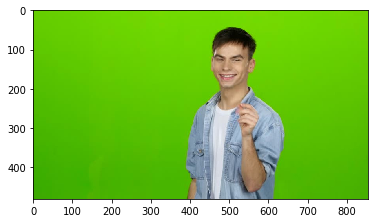

In [6]:
img_np = np.asarray(img)
plt.imshow(img_np)

## R-G-B Channels

In [7]:
img_np_red = img_np[:,:,0]
img_np_green = img_np[:,:,1]
img_np_blue = img_np[:,:,2]

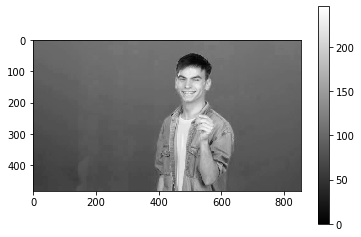

In [8]:
# Red channel
plt.imshow(img_np_red, cmap='gray')
plt.colorbar()

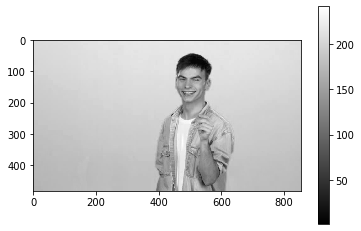

In [9]:
# Green channel
plt.imshow(img_np_green, cmap='gray')
plt.colorbar()

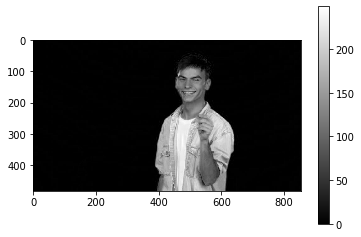

In [10]:
# Blue channel
plt.imshow(img_np_blue, cmap='gray')
plt.colorbar()

## Thresholding

<font color='green'>Green channel</font>

In [11]:
lower_green = 170
higher_green = 220

In [12]:
img_np_green_mask =  (img_np_green >= lower_green) & (img_np_green <= higher_green)
img_np_green_mask = np.logical_not(img_np_green_mask)

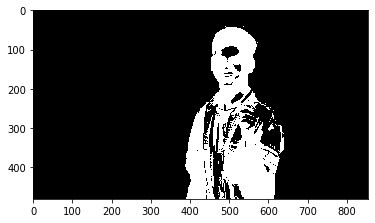

In [13]:
plt.imshow(img_np_green_mask, cmap='gray')

<font color='blue'>Blue channel</font>

In [14]:
lower_blue = 20

In [15]:
img_np_blue_mask =  (img_np_blue >= lower_blue)

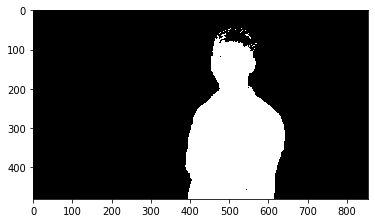

In [16]:
plt.imshow(img_np_blue_mask, cmap='gray')

In [17]:
img_np_mask = np.logical_or(img_np_green_mask, img_np_blue_mask)

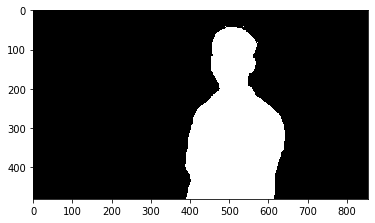

In [18]:
plt.imshow(img_np_mask, cmap='gray')

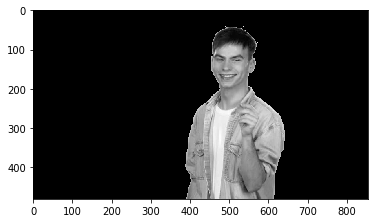

In [19]:
img_np_mask * img_np_green
plt.imshow(img_np_mask * img_np_green, cmap='gray')

## Morphology

In [20]:
# Structure element
structure_element = np.array([[1, 1, 1],
                              [1, 1, 1],
                              [1, 1, 1]])

In [21]:
# Padding
padded_img_np_mask = np.zeros((HEIGHT+1, WIDTH+1))
padded_img_np_mask[1:HEIGHT+1, 1:WIDTH+1] = img_np_mask

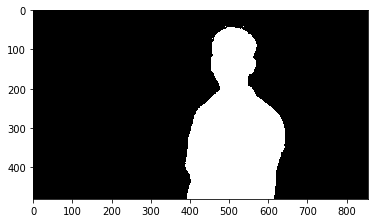

In [22]:
plt.imshow(padded_img_np_mask, cmap='gray')

## Apply the morphology technique "Erosion" to remove artifacts.

In [23]:
final_mask = np.zeros((HEIGHT, WIDTH))

In [24]:
for y in range(1, HEIGHT):
    for x in range(1, WIDTH):
        if np.all(structure_element * padded_img_np_mask[y-1:y+2, x-1:x+2]):
            final_mask[y-1, x-1] = padded_img_np_mask[y, x]

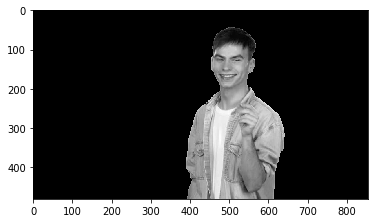

In [25]:
plt.imshow(final_mask*img_np_green, cmap='gray')

In [26]:
final_mask = np.array(final_mask, dtype=np.uint8)

## Apply Final Mask for RGB Image

In [27]:
segmented_human = np.zeros((HEIGHT, WIDTH, 3), dtype=np.uint8)
segmented_human[:, :, 0] = img_np_red * final_mask
segmented_human[:, :, 1] = img_np_green * final_mask
segmented_human[:, :, 2] = img_np_blue * final_mask

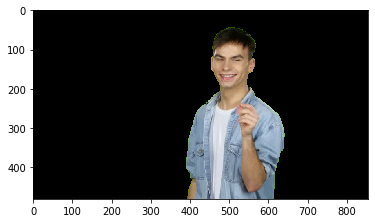

In [28]:
plt.imshow(segmented_human)

In [29]:
result = Image.fromarray(segmented_human)
result.save("result.jpg")

# Residual Image

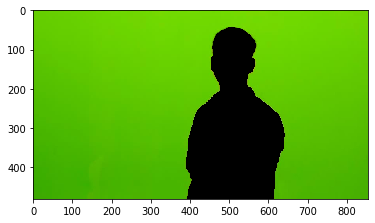

In [30]:
residual_img = img_np - result
plt.imshow(residual_img)
residual_img = Image.fromarray(residual_img)
residual_img.save("residual.jpg")

# Blending

In [31]:
from a1code import gauss2D, conv

<a href="https://www.freepik.com/photos/corridor">Corridor photo created by topntp26 - www.freepik.com</a>

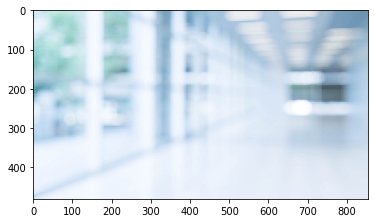

In [32]:
background1 = Image.open("blurred_office.jpg")
background1 = np.array(background1)
plt.imshow(background1)

In [33]:
background1[:, :, 0] = background1[:, :, 0] * (1 - final_mask)
background1[:, :, 1] = background1[:, :, 1] * (1 - final_mask)
background1[:, :, 2] = background1[:, :, 2] * (1 - final_mask)

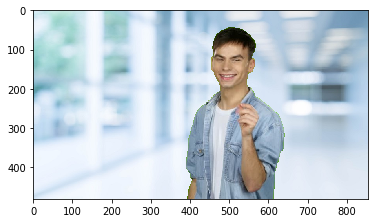

In [34]:
blended = background1 + segmented_human
plt.imshow(blended)

In [35]:
blended = Image.fromarray(blended)
blended.save("blended.jpg")

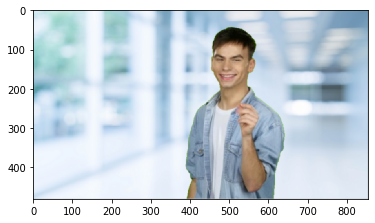

In [36]:
blended_normalized = np.array(blended) / 255
gauss_kernel = gauss2D(7, 1)
filtered_img1 = conv(blended_normalized, gauss_kernel)
plt.imshow(filtered_img1)
filtered_img1 = np.array(filtered_img1 * 255, dtype=np.uint8)
filtered_img1 = Image.fromarray(filtered_img1)
filtered_img1.save("filtered_img1.jpg")

<a href='https://www.freepik.com/photos/nature-blur'>Nature blur photo created by tirachard - www.freepik.com</a>

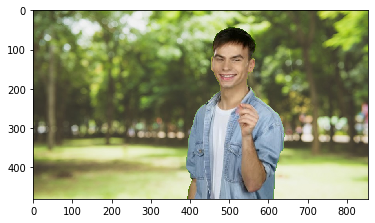

In [37]:
background2 = Image.open("blurred_park.jpg")
background2 = np.array(background2)
plt.imshow(background1)
background2[:, :, 0] = background2[:, :, 0] * (1 - final_mask)
background2[:, :, 1] = background2[:, :, 1] * (1 - final_mask)
background2[:, :, 2] = background2[:, :, 2] * (1 - final_mask)
blended2 = background2 + segmented_human
plt.imshow(blended2)
blended2 = Image.fromarray(blended2)
blended2.save("blended2.jpg")

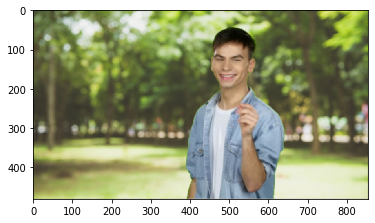

In [38]:
blended2_normalized = np.array(blended2) / 255
gauss_kernel = gauss2D(7, 1)
filtered_img2 = conv(blended2_normalized, gauss_kernel)
plt.imshow(filtered_img2)
filtered_img2 = np.array(filtered_img2 * 255, dtype=np.uint8)
filtered_img2 = Image.fromarray(filtered_img2)
filtered_img2.save("filtered_img2.jpg")